<a href="https://colab.research.google.com/github/daveyeajoon/Red-Wine-Quality/blob/main/Yeajoon_Project2_Red_Wine_Quality__Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
url = "/content/drive/MyDrive/08 Week/winequality-red.csv"
df = pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1)Source of data
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

2) Brief description of data
This dataset is to determine the quality of red wine. 

3) What is the target?
Quality

4) Is this a classification or regression problem?
Classification

5) How many features?
12

6) How many rows of data.
1599

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
Nothing so far. Do you have any advice?

In [4]:
#Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Check for Duplicate
df.duplicated().any()

True

In [6]:
df.duplicated().sum()

240

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
# Check for missings
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

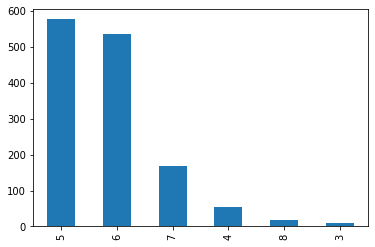

In [23]:
#Check Univariate distributions and explore categorical variable
df['quality'].value_counts().plot(kind = 'bar');

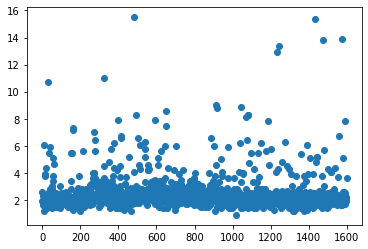

In [24]:
plt.scatter(df.index, df['residual sugar'])
plt.show()

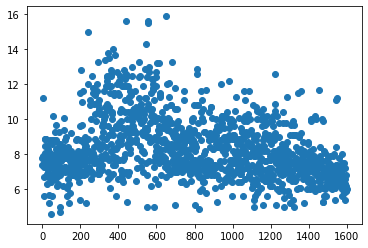

In [15]:
plt.scatter(df.index, df['fixed acidity'])
plt.show()

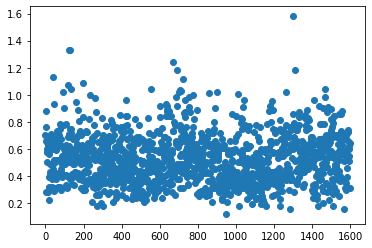

In [16]:
plt.scatter(df.index, df['volatile acidity'])
plt.show()

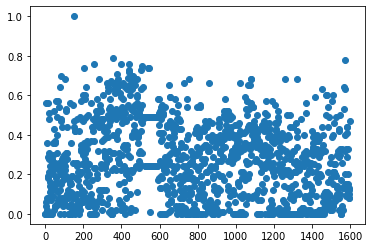

In [17]:
plt.scatter(df.index, df['citric acid'])
plt.show()

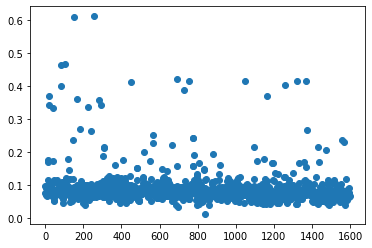

In [25]:
plt.scatter(df.index, df['chlorides'])
plt.show()

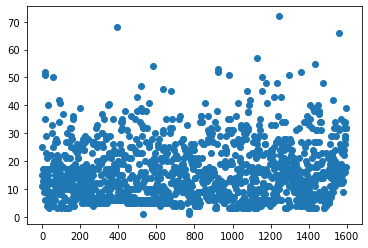

In [26]:
plt.scatter(df.index, df['free sulfur dioxide'])
plt.show()

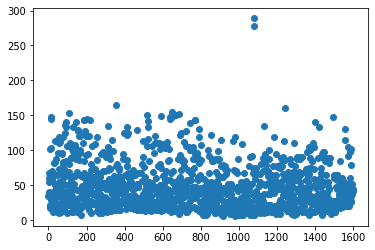

In [27]:
plt.scatter(df.index, df['total sulfur dioxide'])
plt.show()

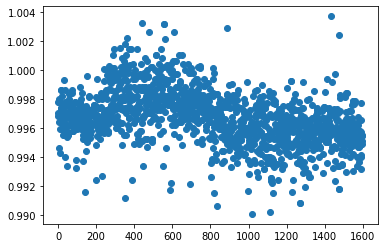

In [28]:
plt.scatter(df.index, df['density'])
plt.show()

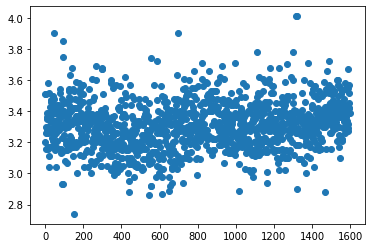

In [30]:
plt.scatter(df.index, df['pH'])
plt.show()

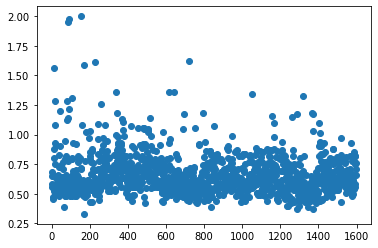

In [31]:
plt.scatter(df.index, df['sulphates'])
plt.show()

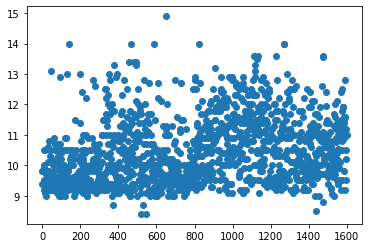

In [32]:
plt.scatter(df.index, df['alcohol'])
plt.show()

In [12]:
#Outliers
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
